# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import tree

In [2]:
df = pd.read_csv('previsao_de_renda.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [4]:
X = df.drop(['Unnamed: 0' , 'data_ref' ], axis = 1)
X.dropna(inplace = True)

In [5]:
X_train, X_test = train_test_split(X, train_size=0.75, random_state=100)

In [6]:
X_a = patsy.dmatrices('''np.log(renda) ~ C(sexo) 
                    + C(posse_de_veiculo) 
                    + C(posse_de_imovel)
                    + qtd_filhos 
                    + C(tipo_renda) 
                    + C(educacao, Treatment(2)) 
                    + C(estado_civil) 
                    + C(tipo_residencia, Treatment(1)) 
                    + idade
                    + tempo_emprego
                    + qt_pessoas_residencia 
                    + 1''', X_train)


In [7]:
modelo_a = smf.ols(X_a, data = X_train).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.00001
                         , alpha = 0)

modelo_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     203.7
Date:                Sat, 19 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:58:52   Log-Likelihood:                -10198.
No. Observations:                9320   AIC:                         2.045e+04
Df Residuals:                    9295   BIC:                         2.063e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             6.5769      0.225     29.203      0.000       6.135       7.018
C(sexo)[T.M]                                          0.7881      0.017     46.436      0.000       0.755       0.821
C(posse_de_veiculo)[T.True]                           0.0332      0.016      2.022      0.043       0.001       0.065
C(posse_de_imovel)[T.True]                            0.0754      0.016      4.673      0.000       0.044       0.107
C(tipo_renda)[T.Bolsista]                             0.1648      0.362      0.455      0.649      -0.546       0.875
C(tipo_renda)[T.Empresário]                           0.1509      0.017      8.727      0.000       0.117       0.185
C(tipo_renda)[T.Pensionista]                         -0.2912      0.257     -1.134      0.257      -0.794       0.212
C(tipo_renda)[T.Servidor público]                     0.0476      0.026      1.848      0.065      -0.003       0.098
C(educacao, Treatment(2))[T.Primário]                -0.0085      0.082     -0.105      0.917      -0.168       0.151
C(educacao, Treatment(2))[T.Pós graduação]            0.2089      0.155      1.348      0.178      -0.095       0.513
C(educacao, Treatment(2))[T.Superior completo]        0.0996      0.016      6.175      0.000       0.068       0.131
C(educacao, Treatment(2))[T.Superior incompleto]      0.0209      0.037      0.567      0.571      -0.051       0.093
C(estado_civil)[T.Separado]                           0.3259      0.115      2.834      0.005       0.101       0.551
C(estado_civil)[T.Solteiro]                           0.2408      0.112      2.145      0.032       0.021       0.461
C(estado_civil)[T.União]                             -0.0145      0.029     -0.501      0.617      -0.071       0.042
C(estado_civil)[T.Viúvo]                              0.3546      0.121      2.931      0.003       0.117       0.592
C(tipo_residencia, Treatment(1))[T.Aluguel]           0.0849      0.063      1.348      0.178      -0.039       0.208
C(tipo_residencia, Treatment(1))[T.Com os pais]       0.0240      0.034      0.711      0.477      -0.042       0.090
C(tipo_residencia, Treatment(1))[T.Comunitário]      -0.0193      0.108     -0.180      0.857      -0.230       0.192
C(tipo_residencia, Treatment(1))[T.Estúdio]           0.1239      0.102      1.215      0.225      -0.076       0.324
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0228      0.045     -0.504      0.614      -0.112       0.066
qtd_filhos                                           -0.2588      0.111     -2.336      0.020      -0.476      -0.042
idade                                                 0.0052      0.001      5.666      0.000       0.003       0.007
tempo_emprego  

In [8]:
#2
modelo = patsy.dmatrices('''renda ~ sexo
                                  + posse_de_veiculo
                                  + C(posse_de_imovel, Treatment(1))
                                  + qtd_filhos
                                  + C(tipo_renda, Treatment(0))
                                  + C(educacao, Treatment(2))
                                  + estado_civil
                                  + C(tipo_residencia, Treatment(1))
                                  + idade
                                  + tempo_emprego
                                  + qt_pessoas_residencia
                                  ''', X_train)
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.01)



reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     121.7
Date:                Sat, 19 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:59:00   Log-Likelihood:                -96962.
No. Observations:                9320   AIC:                         1.940e+05
Df Residuals:                    9295   BIC:                         1.942e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                         -4688.1714   2489.122     -1.883      0.060   -9567.396     191.053
sexo[T.M]                                          6096.6143    187.396     32.533      0.000    5729.276    6463.953
posse_de_veiculo[T.True]                            131.4369    181.085      0.726      0.468    -223.530     486.404
C(posse_de_imovel, Treatment(1))[T.False]          -300.1032    178.199     -1.684      0.092    -649.412      49.206
C(tipo_renda, Treatment(0))[T.Bolsista]           -1449.1393   4001.765     -0.362      0.717   -9293.476    6395.198
C(tipo_renda, Treatment(0))[T.Empresário]           735.6595    191.004      3.852      0.000     361.249    1110.069
C(tipo_renda, Treatment(0))[T.Pensionista]        -2181.9763   2834.454     -0.770      0.441   -7738.127    3374.174
C(tipo_renda, Treatment(0))[T.Servidor público]     -79.8440    284.539     -0.281      0.779    -637.604     477.915
C(educacao, Treatment(2))[T.Primário]              -995.9173    900.140     -1.106      0.269   -2760.388     768.554
C(educacao, Treatment(2))[T.Pós graduação]          599.4642   1711.395      0.350      0.726   -2755.245    3954.173
C(educacao, Treatment(2))[T.Superior completo]      413.3037    178.038      2.321      0.020      64.310     762.297
C(educacao, Treatment(2))[T.Superior incompleto]   -290.0183    406.109     -0.714      0.475   -1086.081     506.045
estado_civil[T.Separado]                           1099.3182   1269.627      0.866      0.387   -1389.429    3588.065
estado_civil[T.Solteiro]                            694.4665   1239.480      0.560      0.575   -1735.186    3124.119
estado_civil[T.União]                              -383.9909    319.330     -1.202      0.229   -1009.949     241.967
estado_civil[T.Viúvo]                              1013.2650   1335.786      0.759      0.448   -1605.168    3631.698
C(tipo_residencia, Treatment(1))[T.Aluguel]         395.7604    695.705      0.569      0.569    -967.973    1759.494
C(tipo_residencia, Treatment(1))[T.Com os pais]     -32.2811    373.103     -0.087      0.931    -763.645     699.082
C(tipo_residencia, Treatment(1))[T.Comunitário]    -170.3556   1188.447     -0.143      0.886   -2499.973    2159.262
C(tipo_residencia, Treatment(1))[T.Estúdio]         766.4539   1126.603      0.680      0.496   -1441.935    2974.843
C(tipo_residencia, Treatment(1))[T.Governamental]   136.1652    499.938      0.272      0.785    -843.824    1116.154
qtd_filhos                                        -1197.9442   1223.286     -0.979      0.327   -3595.854    1199.965
idade                                                40.2946     10.193      3.953      0.000      20.314      60.276
tempo_emprego  

In [9]:
alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1]


for i in alpha:
    md = smf.ols(modelo,data = X_train).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.00001
                         , alpha = i)
    print(f'R² = {md.rsquared} Adj. R² = {md.rsquared_adj} Alpha = {i} ')

R² = 0.24657050047546814 Adj. R² = 0.2446251203798696 Alpha = 0 
R² = 0.24657050047546814 Adj. R² = 0.2446251203798696 Alpha = 0.001 
R² = 0.24657050047546814 Adj. R² = 0.2446251203798696 Alpha = 0.005 
R² = 0.24657050047546814 Adj. R² = 0.2446251203798696 Alpha = 0.01 
R² = 0.24657050047546814 Adj. R² = 0.2446251203798696 Alpha = 0.05 
R² = 0.24657050047546814 Adj. R² = 0.2446251203798696 Alpha = 0.1 


In [11]:
#3
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            print(included+[new_column])
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break

In [12]:
X_train_a = X_train.dropna()

In [13]:
X_train_b = pd.get_dummies(X_train_a, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)
X_train_b.head()

,id_cliente,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,posse_de_veiculo_True,posse_de_imovel_True,tipo_renda_Bolsista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
3889,126,0,50,3.441096,2.0,1338.93,True,True,False,False,...,True,False,False,False,False,False,False,True,False,False
14483,11868,0,52,2.745205,1.0,20103.27,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
762,15457,0,38,6.539726,2.0,839.21,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3078,13825,0,27,7.624658,2.0,819.95,False,True,True,False,...,False,False,False,False,False,True,False,False,False,False
10423,14795,0,47,4.550685,2.0,3333.73,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [14]:
X_train_c = X_train_b.drop(['renda'], axis=1)
y_train_a = X_train_b['renda']

In [15]:
X_train_b.rename(columns = {'educacao_Superior completo':'educacao_Superior_completo'}, inplace=True)

In [16]:
modelo_m = smf.ols('np.log(renda) ~  tempo_emprego + sexo_M + tipo_renda_Empresário + idade + educacao_Superior_completo + qt_pessoas_residencia', data = X_train_b).fit()
modelo_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     837.1
Date:                Sat, 19 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:59:32   Log-Likelihood:                -10224.
No. Observations:                9320   AIC:                         2.046e+04
Df Residuals:                    9313   BIC:                         2.051e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              7.1460      0.046    156.868      0.000       7.057       7.235
sexo_M[T.True]                         0.7936      0.016     49.842      0.000       0.762       0.825
tipo_renda_Empresário[T.True]          0.1441      0.017      8.541      0.000       0.111       0.177
educacao_Superior_completo[T.True]     0.1045      0.016      6.695      0.000       0.074       0.135
tempo_emprego                          0.0616      0.001     51.773      0.000       0.059       0.064
idade                                  0.0058      0.001      6.634      0.000       0.004       0.008
qt_pessoas_residencia                  0.0163      0.008      1.981      0.048       0.000       0.033
==============================================================================
Omnibus:                        0.252   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.223
Skew:                           0.006   Prob(JB):                        0.895
Kurtosis:                       3.021   Cond. No.                         262.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X_test_a = X_test.dropna()
X_test_b = pd.get_dummies(X_test_a, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)
X_test_b.rename(columns = {'educacao_Superior completo':'educacao_Superior_completo'}, inplace=True)
X_test_b['log_renda']=np.log(X_test_b['renda'])

In [18]:
X_test_b['pred_m'] = modelo_m.predict(X_test_b)
r = X_test_b[['pred_m', 'log_renda']].corr().iloc[0,1]
r**2

0.36178948499485036

In [19]:
modelo_n = smf.ols('np.log(renda) ~  tempo_emprego + sexo_M + idade + qt_pessoas_residencia', data = X_train_b).fit()
modelo_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     1208.
Date:                Sat, 19 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:59:42   Log-Likelihood:                -10287.
No. Observations:                9320   AIC:                         2.058e+04
Df Residuals:                    9315   BIC:                         2.062e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.2762      0.044    164.236      0.000       7.189       7.363
sexo_M[T.True]            0.7828      0.016     48.934      0.000       0.751       0.814
tempo_emprego             0.0607      0.001     50.932      0.000       0.058       0.063
idade                     0.0051      0.001      5.777      0.000       0.003       0.007
qt_pessoas_residencia     0.0125      0.008      1.504      0.133      -0.004       0.029
==============================================================================
Omnibus:                        0.323   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.851   Jarque-Bera (JB):                0.289
Skew:                           0.004   Prob(JB):                        0.865
Kurtosis:                       3.026   Cond. No.                         252.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
modelo_o = smf.ols('np.log(renda) ~  tempo_emprego + I(tempo_emprego**2) + sexo_M + idade + qt_pessoas_residencia', data = X_train_b).fit()
modelo_o.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     980.2
Date:                Sat, 19 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:59:45   Log-Likelihood:                -10264.
No. Observations:                9320   AIC:                         2.054e+04
Df Residuals:                    9314   BIC:                         2.058e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.2010      0.046    157.999      0.000       7.112       7.290
sexo_M[T.True]            0.7828      0.016     49.052      0.000       0.752       0.814
tempo_emprego             0.0791      0.003     26.632      0.000       0.073       0.085
I(tempo_emprego ** 2)    -0.0007      0.000     -6.764      0.000      -0.001      -0.000
idade                     0.0054      0.001      6.195      0.000       0.004       0.007
qt_pessoas_residencia     0.0086      0.008      1.032      0.302      -0.008       0.025
==============================================================================
Omnibus:                        0.293   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.267
Skew:                           0.010   Prob(JB):                        0.875
Kurtosis:                       3.018   Cond. No.                     1.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

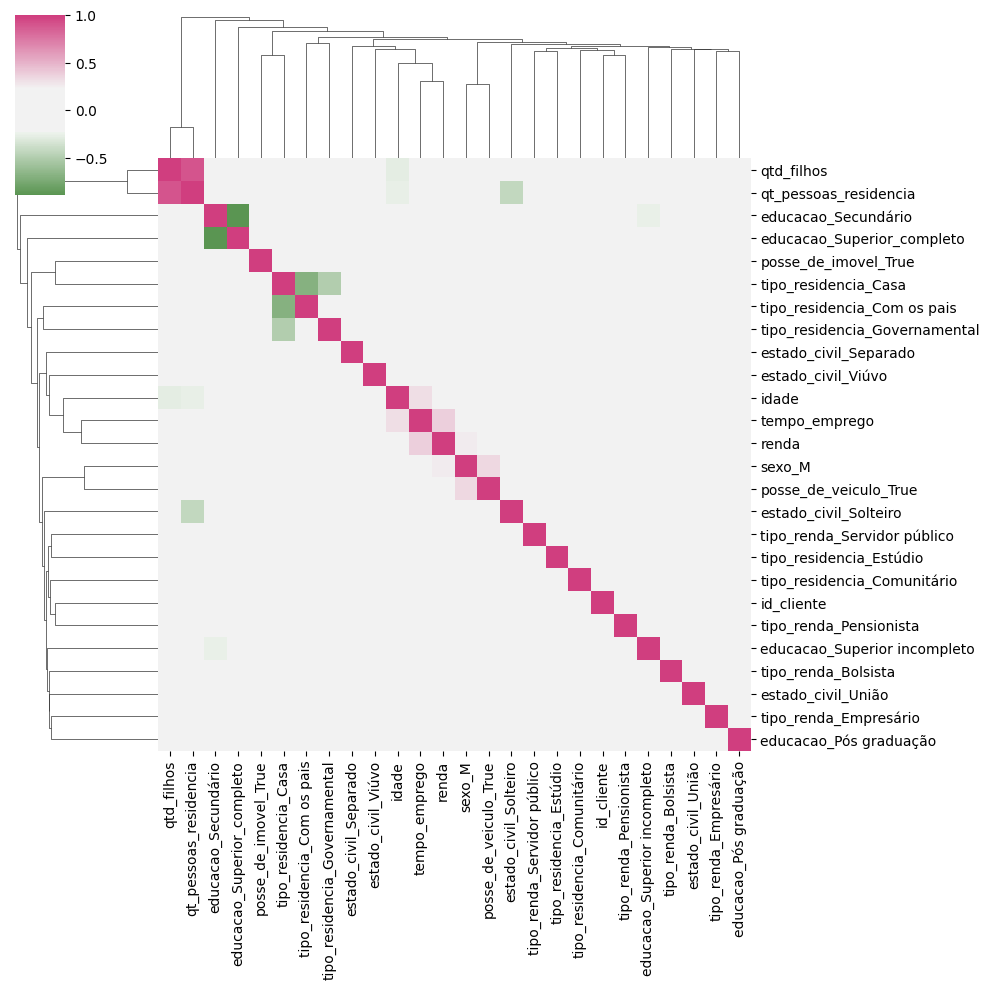

In [21]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(X_train_b.corr(), figsize=(10, 10), center = 0, cmap=cmap)

In [22]:
regr_a = DecisionTreeRegressor(max_depth=4, min_samples_leaf=10)
regr_a.fit(X_train_c, y_train_a)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10)

In [27]:

modelo_p = smf.ols('np.log(renda) ~  tempo_emprego + I(tempo_emprego**2) + sexo_M + idade', data = X_train_b).fit()
modelo_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     1225.
Date:                Sat, 19 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:03:13   Log-Likelihood:                -10265.
No. Observations:                9320   AIC:                         2.054e+04
Df Residuals:                    9315   BIC:                         2.057e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.2277      0.038    192.666      0.000       7.154       7.301
sexo_M[T.True]            0.7842      0.016     49.308      0.000       0.753       0.815
tempo_emprego             0.0793      0.003     26.776      0.000       0.073       0.085
I(tempo_emprego ** 2)    -0.0007      0.000     -6.852      0.000      -0.001      -0.001
idade                     0.0052      0.001      6.122      0.000       0.004       0.007
==============================================================================
Omnibus:                        0.279   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.870   Jarque-Bera (JB):                0.253
Skew:                           0.009   Prob(JB):                        0.881
Kurtosis:                       3.017   Cond. No.                     1.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Regressão Ridge: Quantidade de variáveis explicativas: 23 R²: 0.358 R² - Ajustado: 0.357 R² - Base Teste: 0.354 AIC: 2.040e+04

Regressão LASSO: Quantidade de variáveis explicativas: 4 R²: 0.345 R² - Ajustado: 0.345 R² - Base Teste: 0.338 AIC: 2.055e+04

Regressão Stepwise: Quantidade de variáveis explicativas: 6 R²: 0.354 R² - Ajustado: 0.353 R² - Base Teste: 0.351 AIC: 2.043e+04

As três regressões acabam sendo boas, excluiria o modelo da Regressão de Ridge devido a quantidade de variáveis explicativas, e escolho a LASSO como melhor de todos.